<a href="https://colab.research.google.com/github/Jathurshan0330/Image-Registration-ITK/blob/master/DEMO_Image_Registraionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Requirements

In [1]:
from IPython.display import clear_output

In [2]:
!git clone https://github.com/Jathurshan0330/Image-Registration-ITK.git

Cloning into 'Image-Registration-ITK'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [3]:
%cd /content/Image-Registration-ITK
!pip install -r requirements.txt
clear_output()

# Image Registration of 2 MRI Volumes (.vtk)

In [4]:
# Provide path with the image volumes
base = "/content/drive/MyDrive/Registration Data/"
fixed_image_file = base+"VF-MRT1-1014-1174.vtk"
moving_image_file = base+"VF-MRT2-1014-1174.vtk"
out_image_file_path  = base

In [5]:
!python registraion.py --fixed_img_path "/content/drive/MyDrive/Registration Data/VF-MRT1-1014-1174.vtk" --moving_img_path "/content/drive/MyDrive/Registration Data/VF-MRT2-1014-1174.vtk" --output_path "/content/drive/MyDrive/Registration Data"

fixed_img_path: /content/drive/MyDrive/Registration Data/VF-MRT1-1014-1174.vtk
moving_img_path: /content/drive/MyDrive/Registration Data/VF-MRT2-1014-1174.vtk
output_path: /content/drive/MyDrive/Registration Data
lr: 4
Min_step_length: 0.0005
relax_factor: 0.5
num_iter: 200
num_hist_bins: 24
num_levels: 1
smooth_sigma_level: 0
shrink_level: 1

Fixed Image ====================>
Shape       : (33, 256, 256) 
Pixel Type  : <class 'itk.itkImagePython.itkImageF3'> 
Moving Image ===================>
Shape       : (63, 256, 256) 
Pixel Type  : <class 'itk.itkImagePython.itkImageF3'> 
 Starting Registration ===========================>
Index : 0 -->  Metric : -0.363855   (X,Y,Z) : (0.256409 -3.813188 -1.180615)
Index : 1 -->  Metric : -0.470647   (X,Y,Z) : (0.366235 -7.714076 -2.058688)
Index : 2 -->  Metric : -0.628557   (X,Y,Z) : (-1.687360 -11.044031 -1.225537)
Index : 3 -->  Metric : -0.537375   (X,Y,Z) : (-0.179787 -9.731233 -1.164040)
Index : 4 -->  Metric : -0.609955   (X,Y,Z) : (0.1703

# Visualize Results

In [6]:
from utils import plotting_images, interactive_plot, get_merged_img
import os
import itk

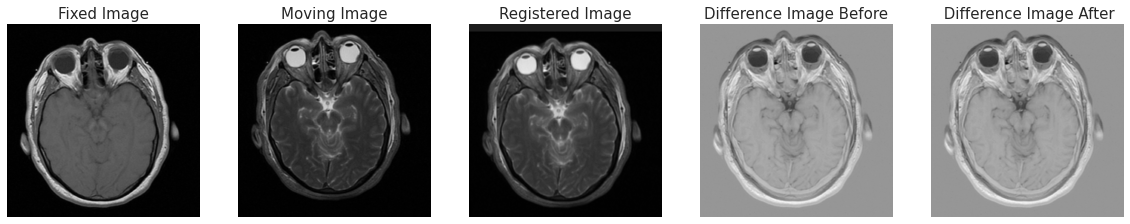

In [7]:
slice = 20
fixed_image = itk.imread(fixed_image_file)
moving_image = itk.imread(moving_image_file)
reg_image_trans = itk.imread(os.path.join(out_image_file_path, 'reg_trans.vtk'))
img_before_trans = itk.imread(os.path.join(out_image_file_path, 'img_before_trans.vtk'))
img_after_trans = itk.imread(os.path.join(out_image_file_path, 'img_before_trans.vtk'))

plotting_images([fixed_image[slice],moving_image[slice],reg_image_trans[slice],img_before_trans[slice],img_after_trans[slice]],
                ["Fixed Image", "Moving Image","Registered Image","Difference Image Before"," Difference Image After"])


In [8]:
interactive_plot([fixed_image,moving_image,reg_image_trans,img_before_trans,img_after_trans],
                ["Fixed Image", "Moving Image","Registered Image","Difference Image Before","Difference Image After"])

interactive(children=(IntSlider(value=0, continuous_update=False, description='Select Slice', max=32), Output(…

In [9]:
before_img = get_merged_img(fixed_image, moving_image,num_regions = 2)
aft_img = get_merged_img(fixed_image, reg_image_trans,num_regions = 2)

before_img2 = get_merged_img(fixed_image, moving_image,num_regions = 4)
aft_img2 = get_merged_img(fixed_image, reg_image_trans,num_regions = 4)

interactive_plot([fixed_image,moving_image, before_img,aft_img,before_img2,aft_img2],
                ["Fixed Image", "Moving Image","Before Registration", "After Registration", "Before Registration", "After Registration"])

interactive(children=(IntSlider(value=0, continuous_update=False, description='Select Slice', max=32), Output(…